In [2]:
import cv2
import os
import numpy as np
import librosa
import mediapipe as mp

mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1, min_detection_confidence=0.5)

In [3]:


# Function to process audio and get MFCC features
def get_mfcc_features(audio_path):
    y, sr = librosa.load(audio_path, sr=None)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfcc_mean = np.mean(mfcc, axis=1)
    return mfcc_mean

# Function to process video and get facial landmarks for each frame using MediaPipe
def process_video(video_path):
    cap = cv2.VideoCapture(video_path)
    frame_landmarks = []
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = face_mesh.process(rgb_frame)
        
        if results.multi_face_landmarks:
            for face_landmarks in results.multi_face_landmarks:
                landmark = np.array([(lm.x, lm.y, lm.z) for lm in face_landmarks.landmark]).flatten()
                frame_landmarks.append(landmark)
    
    cap.release()
    return frame_landmarks

# Function to read data from files and combine features
def read_data_from_files(main_directory_audio, main_directory_video):
    data = []
    
    for class_folder in os.listdir(main_directory_audio):
        class_folder_path_audio = os.path.join(main_directory_audio, class_folder)
        class_folder_path_video = os.path.join(main_directory_video, class_folder)
        
        if os.path.isdir(class_folder_path_audio) and os.path.isdir(class_folder_path_video):
            audio_files = {f[:-4]: f for f in os.listdir(class_folder_path_audio) if f.endswith('.wav')}
            video_files = {f[:-4]: f for f in os.listdir(class_folder_path_video) if f.endswith('.mp4')}
            common_files = set(audio_files.keys()).intersection(video_files.keys())
            
            for base_name in common_files:
                filepath_audio = os.path.join(class_folder_path_audio, audio_files[base_name])
                filepath_video = os.path.join(class_folder_path_video, video_files[base_name])
                print(base_name)
                
                mfcc_features = get_mfcc_features(filepath_audio)
                
                frame_landmarks = process_video(filepath_video)
                
                for landmark in frame_landmarks:
                    if landmark.size > 0:
                        combined_features = np.concatenate([mfcc_features, landmark])
                        data.append((combined_features, class_folder))
                    else:
                        print(f"No landmarks found for frame in video {base_name}, skipping.")
    
    return data




In [4]:
# Example usage
data_directory_audio = 'Real-life_Deception_Detection_2016/Audio'
data_directory_video = 'Real-life_Deception_Detection_2016/Clips'
data = read_data_from_files(data_directory_audio, data_directory_video)

# Separate features and labels
features = np.array([d[0] for d in data])
labels = np.array([d[1] for d in data])

print("Features shape:", features.shape)
print("Labels shape:", labels.shape)

trial_lie_006
trial_lie_034
trial_lie_012
trial_lie_051
trial_lie_044
trial_lie_056
trial_lie_013
trial_lie_026
trial_lie_048
trial_lie_009
trial_lie_010
trial_lie_019
trial_lie_046
trial_lie_033
trial_lie_029
trial_lie_043
trial_lie_003
trial_lie_008
trial_lie_004
trial_lie_007
trial_lie_023
trial_lie_039
trial_lie_032
trial_lie_053
trial_lie_054
trial_lie_021
trial_lie_015
trial_lie_047
trial_lie_014
trial_lie_035
trial_lie_038
trial_lie_045
trial_lie_058
trial_lie_049
trial_lie_001
trial_lie_037
trial_lie_040
trial_lie_042
trial_lie_059
trial_lie_060
trial_lie_020
trial_lie_052
trial_lie_024
trial_lie_057
trial_lie_002
trial_lie_025
trial_lie_041
trial_lie_005
trial_lie_018
trial_lie_031
trial_lie_055
trial_lie_022
trial_lie_050
trial_lie_017
trial_lie_011
trial_lie_028
trial_lie_030
trial_lie_061
trial_lie_027
trial_lie_036
trial_lie_016
trial_truth_047
trial_truth_044
trial_truth_051
trial_truth_028
trial_truth_037
trial_truth_040
trial_truth_012
trial_truth_002
trial_truth_043
tr

In [5]:
import pickle

# Print the shapes of the features and labels
print("Features shape:", features.shape)
print("Labels shape:", labels.shape)

# Save features and labels to a pkl file
with open('MediaAudio.pkl', 'wb') as file:
    pickle.dump((features, labels), file)

print("Data saved to data.pkl")

Features shape: (78524, 1417)
Labels shape: (78524,)
Data saved to data.pkl


In [1]:
import pickle

# Load features and labels from the pkl file
with open('MediaAudio.pkl', 'rb') as file:
    features, labels = pickle.load(file)

print("Features shape:", features.shape)
print("Labels shape:", labels.shape)

Features shape: (78524, 1417)
Labels shape: (78524,)


In [2]:
import pandas as pd

features_df = pd.DataFrame(features)
features_df['label'] = labels

print(features_df)

                0           1          2          3         4          5  \
0     -321.289398  131.572754  -9.841522  31.582964  2.458299   2.415217   
1     -321.289398  131.572754  -9.841522  31.582964  2.458299   2.415217   
2     -321.289398  131.572754  -9.841522  31.582964  2.458299   2.415217   
3     -321.289398  131.572754  -9.841522  31.582964  2.458299   2.415217   
4     -321.289398  131.572754  -9.841522  31.582964  2.458299   2.415217   
...           ...         ...        ...        ...       ...        ...   
78519 -519.300049  135.141190 -21.046791  33.217300 -6.210795  15.608702   
78520 -519.300049  135.141190 -21.046791  33.217300 -6.210795  15.608702   
78521 -519.300049  135.141190 -21.046791  33.217300 -6.210795  15.608702   
78522 -519.300049  135.141190 -21.046791  33.217300 -6.210795  15.608702   
78523 -519.300049  135.141190 -21.046791  33.217300 -6.210795  15.608702   

               6          7         8          9  ...      1408      1409  \
0      -3.

In [3]:
from sklearn.model_selection import train_test_split
# Split into training, validation, and test sets
train_df, test_df = train_test_split(features_df, test_size=0.2, random_state=42)
# 0.25 x 0.8 = 0.2
train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42)

In [4]:
print(train_df.shape)
print(test_df.shape)
print(val_df.shape)

(47114, 1418)
(15705, 1418)
(15705, 1418)


In [5]:
def separate_features_and_labels(df):
    X = df.drop(columns=['label']).values  # Drop the label column to get features
    y = df['label'].apply(lambda x: 1 if x == 'Truthful' else 0).values  # Convert labels to binary
    return X, y

X_train, y_train = separate_features_and_labels(train_df)
X_val, y_val = separate_features_and_labels(val_df)
X_test, y_test = separate_features_and_labels(test_df)

In [6]:
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models

input_shape = (X_train.shape[1], X_train.shape[2])  # (timesteps, features)
model = models.Sequential([
    layers.LSTM(1024, input_shape=input_shape, return_sequences=True),
    layers.Dropout(0.2),
    layers.LSTM(512, return_sequences=True),
    layers.Dropout(0.2),
    layers.LSTM(256, return_sequences=False),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

learning_rate = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 1024)           10002432  
                                                                 
 dropout (Dropout)           (None, 1, 1024)           0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 512)            3147776   
                                                                 
 dropout_1 (Dropout)         (None, 1, 512)            0         
                                                                 
 lstm_2 (LSTM)               (None, 256)               787456    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense (Dense)               (None, 1)                 2

In [8]:
batch_size = 64
epochs = 10

history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(X_val, y_val))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test Loss: {test_loss:.4f}')

Epoch 1/10
737/737 [==============================] - 12s 14ms/step - loss: 0.2011 - accuracy: 0.9042 - val_loss: 0.0627 - val_accuracy: 0.9712
Epoch 2/10
737/737 [==============================] - 9s 12ms/step - loss: 0.0713 - accuracy: 0.9650 - val_loss: 0.0503 - val_accuracy: 0.9864
Epoch 3/10
737/737 [==============================] - 9s 12ms/step - loss: 0.0541 - accuracy: 0.9761 - val_loss: 0.0417 - val_accuracy: 0.9705
Epoch 4/10
737/737 [==============================] - 9s 12ms/step - loss: 0.0399 - accuracy: 0.9838 - val_loss: 0.0148 - val_accuracy: 0.9962
Epoch 5/10
737/737 [==============================] - 9s 12ms/step - loss: 0.0264 - accuracy: 0.9888 - val_loss: 0.0286 - val_accuracy: 0.9769
Epoch 6/10
737/737 [==============================] - 9s 12ms/step - loss: 0.0224 - accuracy: 0.9897 - val_loss: 0.0055 - val_accuracy: 0.9964
Epoch 7/10
737/737 [==============================] - 9s 12ms/step - loss: 0.0149 - accuracy: 0.9951 - val_loss: 0.0031 - val_accuracy: 0.999

In [9]:
model.save('mediapipe_with_audio.h5')

In [9]:
#loaded_model = tf.keras.models.load_model('mediapipe_with_audio.h5')
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test Loss: {test_loss:.4f}')

491/491 [==============================] - 3s 5ms/step - loss: 0.0023 - accuracy: 0.9999
Test Accuracy: 0.9999
Test Loss: 0.0023


491/491 [==============================] - 3s 5ms/step - loss: 0.0049 - accuracy: 0.9999
Test Accuracy: 0.999872624874115
Confusion Matrix:
[[7735    2]
 [   0 7968]]


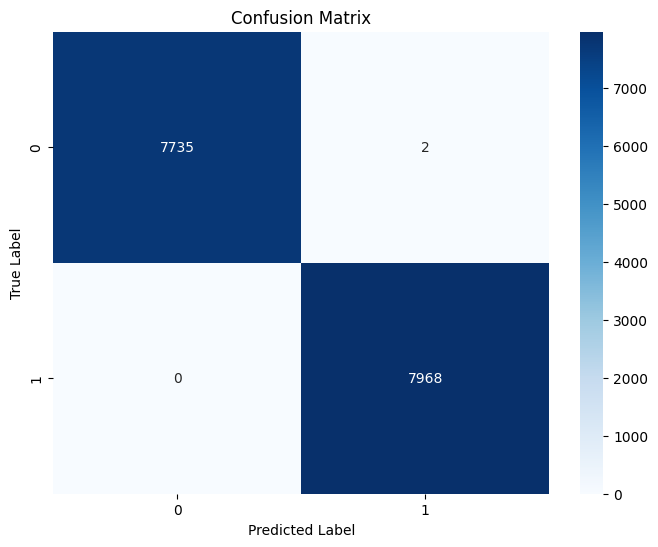

Precision: 0.9997490589711417
Recall: 1.0
F1 Score: 0.9998745137407454


In [15]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the model
loaded_model = tf.keras.models.load_model('mediapipe_with_audio.h5')

# Evaluate the model on the test set
test_loss, test_accuracy = loaded_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

# Predict probabilities
test_probabilities = loaded_model.predict(X_test)
test_predictions = (test_probabilities > 0.5).astype(int)

# Encode the labels
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(y_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, test_predictions)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Calculate and print precision, recall, and F1 score
precision = precision_score(y_test, test_predictions, average='binary')
recall = recall_score(y_test, test_predictions, average='binary')
f1 = f1_score(y_test, test_predictions, average='binary')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


